<center><h1>Równania różniczkowe w technice</h1></center>

# **Temat projektu:** Dynamika wchłaniania się leków - farmakokinetyka

## Spis treści:

1. Wstęp
2. Nota historyczna
3. Modele farmakokinetyczne

    3.1. Kompartment - czym jest?

    3.2. Otwarty model jednokompartmentowy

    3.3. Założenia otwartego modelu jednokompartmentowego

    3.4. Stężenie leku we krwi

    3.5. Inne modele
    
4. LADME

    4.1. Los leku w organizmie, czyli LADME

    4.2. Opis procesów

5. Metody numeryczne

    5.1. Metoda Eulera

    5.2. Implementacja metody Eulera

    5.3. Metoda Heuna

    5.4. Implementacja metody Heuna

    5.5. Algorytm Rungego-Kutty rzędu 4

    5.6. Implementacja algorytmu Rungego-Kutty rzędu 4

6. Przykłady

    6.1. Implementacja modelu jednokompartmentowego - dawka dożylna

    6.2. Implementacja modelu jednokopmartmentowego - dawka pozanaczyniowa

    6.3. Implementacja modelu jednokompartmentowego - wlew dożylny 

    6.4. Podsumowanie
    
7. Bibliografia


### 1. Wstęp [3]

**Farmakokinetyka** *(pharmacokinetics)* to dziedzina nauki zajmująca się badaniem i opisywaniem w sposób matematyczny losów leku podanego żywemu organizmowi. Podczas badań farmakokinetycznych zawraca się uwagę, na wpływ czasu na procesy wchłaniania, rozmieszczenia jak i wydalania leku zachodzące w organizmie żywym. Wiele uwagi skupia się również na sposobie (drodze) podania leku jak i dawce, aby w przyszłości był on jak najbardziej efektywny. Podstawowymi celami dzisiejszej farmakokinetyki jest kontrola leku podczas każdego etapu wprowadzania go na rynek, jak i optymalizacja postaci istniejących już leków, eliminacja zagrożeń związanych z farmakoterapią i zwiększenie jej efektywności. 

### 2. Nota historyczna [2]

Początki farmakokinetyki przypisuje się na drugą połowę XIX wieku, kiedy to John Snow opisał wykładniczy zanik chloroformu we krwi. Jako pierwszą publikację z zakresu farmakokinetyki uznaje się *Kinetics of distribution of substances administered to the body* skupiającą się na rozprowadzeniu leków podanych donaczyniowo, autorstwa Torstena i Teorella wydaną w 1937r. Termin farmakokinetyka został wprowadzony dopiero w 1958r. przez profesora Friedricha Harmuta Dosta w monografie *Der Blutspiegel. Kinetik der Konzentrations Ablaufe in der Kriesslaufflussigkeit.*, który zawierał podstawy dzisiejszej farmakokinetyki. Co ciekawe F.H. Dost był z wykształcenia profesorem pediatrii i samoukiem matematyki. Jak możemy zauważyć na wykresie (Rys.1) farmakokinetyka jest wciąż rozwijającą się dziedziną nauki, co dowodzi rosnąca liczba publikacji na jej temat.



<center><img src="obrazy/publikacje.PNG">
<figcaption>Rys.1  Liczba publikacji naukowych (rocznie) zawierających słowo kluczowe “pharmacokinetics”
 lub “pharmacodynamics” w tytule publikacji (źródło: NCBI). </figcaption></center>



### 3. Modele farmakokinetyczne

#### 1. Kompartment - czym jest? [1]

W celu matematycznej interpretacji badań farmakokinetycznych należy przyjąć odpowiedni model, który wymaga założenia, że organizm składa się z jednego lub kilku tzw. kompartmentów.

Struktury anatomiczne organizmu nie zawsze współgrają z przyjętymi w modelu matematycznym kompartmentami.

Przez złożoność struktury, organizmy należy traktować jako układ wielokompartmentowy, ale ponieważ wiele tkanek w badaniach wykazuje podobne reakcje w odniesieniu do podanego leku, można traktować tkanki jako jeden kompartment, przez co ilość kompartmentów zmniejsza się do co najwyżej kilku.

Pojęcie kompartamentu nie zawsze odnosi się do miejsca występowania podanej substancji leczniczej, lecz może się też odnosić do występowania substancji w różnych formach.

Biorąc pod uwagę dwa powyższe założenia, możemy określić definicję kompartamentu:

*W farmakokinetyce i farmakologii klinicznej mianem kompartmentu określa się przestrzeń w organizmie w której lek rozmieszcza się równomiernie w jednostce czasu. Pojęcie to nie jest związane z istniejącymi barierami anatomicznymi czy fizjologicznym, wiąże się natomiast z istnieniem w obrębie jednego kompartmentu zbliżonych stężeń leku w analizowanym punkcie czasowym*. [2]

Wyróżnia się następujące kompartmenty w organizmie: [2]
- kompartment centralny - krew, czasami również płyn międzykomórkowy, dobrze ukrwione narządy
- kompartment obwodowy, peryferyjny - tkanki, narządy słabo ukrwione; każda inna przestrzeń niż centralna do której zachodzi dystrybucja
- kompartment tkankowy - tkanki słabo ukrwione, do których lek przenika długo
- kompartment efektorowy - każde miejsce do którego jest w stanie dotrzeć lek, takie które zagwarantuje uzyskanie efektu terapeutycznego 

#### 2. Otwarty model jednokompartmentowy

Modelowanie farmakokinetyczne za pomocą kompartamentów, w których podany do organizmu lek obejmuje tylko jeden kompartment nazywamy jednokompartmentowym. Model ten niezbyt odzwierciedla stan faktyczny podanego leku, ponieważ przyjmuje tylko jeden kompartment i zakłada, że lek jest od razu eliminowany. Bardziej realny model jednokompartmentowy, to taki, który zakłada istnienie kompartmentu obwodowego, czyli tkanki lub narządu słabo ukrwionego. [2]

Modele dwukompartmentowe, trzykompartmentowe bliżej przypominają realia fizjologii organizmu. Zakładają one istnienie nie tylko kompartmentu centralnego, ale też innych, przez co badanie dystrybucji leku jest łatwiejsze.

#### 3. Założenia modelu jednokompartmentowego

- Objętość kompartamentu jest stała
- Stężenie jest jednakowe w każdym punkcie kompartmentu
- Kompartment nie musi wchłonąć całego leku, strumień wchłaniania jest proporcjonalny do strumienia dozowania
- Strumień eliminacji jest proporcjonalny do masy


#### 4. Stężenie leku we krwi [1]

##### Dawka dożylna

Opis transportu leku w organizmie można zapisać za pomocą liniowych równań różniczkowych. Przyjmuje się, że modele liniowe są stacjonarne, czyli pojawiające się w równaniach różniczkowych stałe szybkości są niezależne od czasu. Należy też wspomnieć, że bardzo rzadko pacjenta można wyleczyć tylko jedną dawką leku, dlatego stworzono inne modele, nieliniowe, w których można przyjąć podawanie leku co, np. kilka dni.

Aby zapisać model liniowy za pomocą równań różniczkowych należy wprowadzić oznaczenia:

$X_0$ - masa leku podana dożylnie,

$X$ - masa leku we krwi (całym kompartamencie) w czasie t,

$X_u$ - masa leku wydalona do moczu w czasie t,

$X_{nr}$ - masa leku wydalona drogami pozanerkowymi w czasie t,

$\mathrm{k_e}$ - stała szybkości wydalania leku przez nerki zgodnie z procesem pierwszego rzędu,

$\mathrm{k_{nr}}$ - stała szybkości pierwszego rzędu wydalania leku drogami pozanerkowymi.

$K$ czyli stała szybkości eliminacji leku z organizmu jest sumą wszystkich stałych szybkości wydalania.

$$ K=\mathrm{k_e}+\mathrm{k_{nr}} $$

Należy też wprowadzić pojęcie objętości dystrybucji, czyli hipotetycznej objętości płynów ustrojowych.

$$ \mathrm{V_d}= \frac{X}{\mathrm{C}} $$
$$ X=\mathrm{V_d} \cdot \mathrm{C} $$

Model można zapisać następująco, zakładając, że podany lek ulega dystrybucji natychmiastowej w całym kompartamencie:

$$ \frac{\mathrm{d}X}{\mathrm{d}t} = -\mathrm{K} \cdot X $$

Korzystając z metody rozdzielonych zmiennych, rozwiążemy to równanie.

$$ \frac{\mathrm{d}X}{\mathrm{d}t} = -\mathrm{K} \cdot X / \cdot \frac{\mathrm{d}t}{X}$$

Obliczmy całkę oznaczoną.

$$ \int_{X_O}^X \frac{\mathrm{d}X}{X} = -\mathrm{K} \int_{0}^t \mathrm{\mathrm{d}t} $$

$$ \mathrm{ln}X - \mathrm{ln}X_0 = -\mathrm{K} \cdot t$$

Ostatecznie, otrzymujemy:

$$X = X_0 \cdot \mathrm{e}^{-\mathrm{K} \cdot t}$$

Zamieńmy teraz $X$ na $C$, korzystając z przekształconego wzoru na $\mathrm{V_d}$.

$$ \mathrm{V_d} \cdot \mathrm{C}=\mathrm{V_d} \cdot \mathrm{C_0} \cdot \mathrm{e}^{-\mathrm{K} \cdot t}$$

Po uproszczeniu, funkcja jest postaci:

$$ C(t)=\mathrm{C_0} \cdot \mathrm{e}^{-\mathrm{K} \cdot t} $$

##### Dawka pozanaczyniowa

Do zapisania modelu z dawką pozanaczyniową, będą potrzebne nam dodatkowe oznaczenia:

$X_D$ - ilość leku w żołądku (mięśniu, jelicie grubym, itp.)

$\mathrm{k_a}$ - stała szybkości pierwszego rzędu absorpcji leku do krwi

Naszym celem jest znalezienie wzorów na $X_D$, $X$ i $X_u$. W tym celu rozwiążmy następujące równania różniczkowe.

$$-\frac{\mathrm{d}X_D}{\mathrm{d}t}=\mathrm{k_a} \cdot X_D \tag{1}$$

$$ \frac{\mathrm{d}X}{\mathrm{d}t}=\mathrm{k_a} \cdot X_D - \mathrm{k_e} \cdot X \tag{2}$$

$$ \frac{\mathrm{d}X_u}{\mathrm{d}t}=\mathrm{k_e} \cdot X \tag{3}$$

Masa leku w żołądku jest łatwa do znalezienia, gdyż jest to, to samo równanie, co w przypadku dawki dożylnej, a więc:

$$ X_D=X_{D_0} \cdot \mathrm{e}^{-\mathrm{k_a} \cdot t} $$

Spróbujmy teraz rozwiązać równanie z $X$, w tym celu zróżniczkujmy je jeszcze raz.

$$ \frac{\mathrm{d}^2 X}{\mathrm{d} t^2} = \mathrm{k}_a \cdot \frac{\mathrm{d}X_D}{\mathrm{d}t} - \mathrm{k}_e \cdot \frac{\mathrm{d}X}{\mathrm{d}t}$$

$$ \frac{\mathrm{d}^2 X}{\mathrm{d} t^2} + \mathrm{k}_e \cdot \frac{\mathrm{d}X}{\mathrm{d}t} - \mathrm{k}_a \cdot \frac{\mathrm{d}X_D}{\mathrm{d}t} =0$$

Wykorzystajmy teraz równania różniczkowe z $X_d$.



$$ \frac{\mathrm{d}^2 X}{\mathrm{d} t^2} + \mathrm{k}_e \cdot \frac{\mathrm{d}X}{\mathrm{d}t} + \mathrm{k_a} \cdot \mathrm{k_a} \cdot X_D = 0$$

Z równania (2) wiemy, że:
$$\mathrm{k_a} \cdot X_D = \frac{\mathrm{d}X}{\mathrm{d}t}+\mathrm{k_e} \cdot X $$

Po wstawieniu, równanie prezentuje się następująco:
$$ \frac{\mathrm{d}^2 X}{\mathrm{d} t^2} + \mathrm{k_e} \cdot \frac{\mathrm{d}X}{\mathrm{d}t} + \mathrm{k_a} \cdot (\frac{\mathrm{d}X}{\mathrm{d}t}+\mathrm{k_e}\cdot X)=0$$

$$ \frac{\mathrm{d}^2 X}{\mathrm{d} t^2} + (\mathrm{k}_a+\mathrm{k}_e)\cdot \frac{\mathrm{d}X}{\mathrm{d}t}+\mathrm{k}_a \cdot \mathrm{k}_e \cdot X=0 $$

Doprowadziliśmy równanie do równania różniczkowego drugiego rzędu o stałych współczynnikach.

Niech $ X(t)=y(t)$. Wtedy:

$$y'' + (\mathrm{k}_a+\mathrm{k}_e) \cdot y' + \mathrm{k}_a \cdot \mathrm{k}_e \cdot y=0$$

Przewidywane rozwiązanie to:

$$y(t) = C_1 \cdot \mathrm{e}^{r_1 \cdot t} + C_2 \cdot \mathrm{e}^{r_2 \cdot t}$$

Napiszmy równanie charakterystyczne, aby obliczyć $r_1$ i $r_2$.

$$r^2 + (\mathrm{k}_a+\mathrm{k}_e)\cdot r+\mathrm{k}_a\cdot\mathrm{k}_e=0$$
$$\Delta=(\mathrm{k}_a-\mathrm{k}_e)^2$$
$$r_1=-\mathrm{k}_a$$
$$r_2=-\mathrm{k}_e$$

Wprowadźmy warunki początkowe. Niech $y(0)=0$. Po wstawieniu do naszego rozwiązania mamy:

$$C_1+C_2=0$$

Po wstawieniu wyliczonych $r_1$ i $r_2$, otrzymujemy:

$$y(t) = C_1 \cdot \mathrm{e}^{-\mathrm{k}_a \cdot t} + C_2 \cdot \mathrm{e}^{-\mathrm{k}_e \cdot t}$$

$$ y'(t)= -\mathrm{k}_a C_1 \cdot \mathrm{e}^{-\mathrm{k}_a \cdot t} - \mathrm{k}_e C_2 \cdot \mathrm{e}^{-\mathrm{k}_e \cdot t} $$

Wiemy, że

$$X'(t)= \mathrm{k}_a \cdot X_D - \mathrm{k}_e \cdot X$$

Po wstawieniu naszego podstawienia:

$$y'(t)= \mathrm{k}_a \cdot X_D - \mathrm{k}_e \cdot y$$

Dla $t=0$ mamy

$$ y'(0)=\mathrm{k}_a \cdot X_D $$

oraz

$$ y'(0)= -\mathrm{k}_a C_1 - \mathrm{k}_e C_2$$






Ostatecznie otrzymujemy:

$$\begin{cases} 
C_1=-C_2\\
\mathrm{k}_a \cdot X_D= -\mathrm{k}_a C_1 - \mathrm{k}_e C_2
\end{cases}$$

Po rozwiązaniu tego układu równań otrzymujemy:

$$ \begin{cases}
C_1=\frac{\mathrm{k}_a X_D}{\mathrm{k}_e-\mathrm{k}_a}\\
C_2=-\frac{\mathrm{k}_a X_D}{{\mathrm{k}_e-\mathrm{k}_a}}
\end{cases}$$

Po wstawieniu wyliczonych stałych do równania mamy ostateczne rozwiązanie w postaci:

$$y(t)=\frac{\mathrm{k}_a X_D}{\mathrm{k}_e-\mathrm{k}_a} \cdot \mathrm{e}^{-\mathrm{k}_a t} - \frac{\mathrm{k}_a X_D}{{\mathrm{k}_e-\mathrm{k}_a}} \cdot \mathrm{e}^{-\mathrm{k}_e t}$$

Po prostych przekształceniach ostatecznie otrzymujemy:

$$ X= \frac{\mathrm{k}_a \cdot X_{D_0}}{\mathrm{k}_a-\mathrm{k}_e} \cdot (\mathrm{e}^{\mathrm{-k}_e \cdot t} - \mathrm{e}^{\mathrm{-k}_a \cdot t})$$

Dzieląc równanie przez $V_d$ uzyskuje się wzór na stężenie leku we krwi, zwany wzorem Batemana.

$$ C= \frac{\mathrm{k}_a \cdot X_{D_0}}{V_d \cdot (\mathrm{k}_a-\mathrm{k}_e)} \cdot (\mathrm{e}^{\mathrm{-k}_e \cdot t} - \mathrm{e}^{\mathrm{-k}_a \cdot t})$$

##### Wlew dożylny

Wlew dożylny, czyli np. kroplówka, to podawanie leku przez dłuższy, określony czas, ze stałą szybkością $\mathrm{k_0}$.

Zapiszmy ten model używając równań różniczkowych i rozwiążmy za pomocą metody rozdzielonych zmiennych.

$$\frac{\mathrm{d}X}{\mathrm{d}t}=\mathrm{k_0}-\mathrm{K}\cdot X$$

$$ \mathrm{d}X=(\mathrm{k_0}-KX)\mathrm{d}t $$

Załóżmy, że $\mathrm{k_0} \neq KX$.

$$\frac{\mathrm{d}X}{\mathrm{k_0}-KX}=\mathrm{d}t $$

Po scałkowaniu otrzymujemy:

$$ \frac{-\mathrm{ln}{(KX- \mathrm{k_0})}}{\mathrm{K}}= t + \mathrm{C}$$

gdzie $\mathrm{C}$ to dowolna stała.

Po prostych działaniach mamy:

$$ KX - \mathrm{k_0}=\mathrm{e}^{-t\cdot K} \cdot \mathrm{D} $$

gdzie $\mathrm{D}$ to stała.

$$ X= \frac{\mathrm{k_0}}{\mathrm{K}}+ \mathrm{D} \cdot \mathrm{e}^{-\mathrm{K}t} $$

Wprowadźmy warunek początkowy $X(0)=0$

Wtedy $D=-\frac{\mathrm{k_0}}{\mathrm{K}}$, co ostatecznie daje nam rozwiązanie w postaci:

$$X=\frac{\mathrm{k_0}}{\mathrm{K}} \cdot (1 -\mathrm{e}^{-\mathrm{K}t})$$

Po podzieleniu przez $V_d$, otrzymujemy:

$$C=\frac{\mathrm{k_0}}{\mathrm{K} \cdot V_d} \cdot (1 -\mathrm{e}^{-\mathrm{K}t})$$

Równanie to opisuje model do momentu trwania wlewu, natomiast po zakończeniu stężenie leku maleje zgodnie ze wzorem:

$$C=\frac{\mathrm{k_0}}{\mathrm{K} \cdot V_d} \cdot (1 -\mathrm{e}^{-\mathrm{K}T}) \cdot \mathrm{e}^{-\mathrm{K}t'} $$

gdzie:

$T$ - czas trwania wlewu dożylnego

$t'$ - czas upływający począwszy od zakończenia wlewu

#### 5. Inne modele

W obecnych czasach w badaniach farmakokinetycznych wykorzystuje się kilka metod obliczeniowych. Metody te są poparte określonym podejściem modelu doświadczalnego. Przez postęp technologiczny tworzenia leków, sposoby modelowania badań zostały wzbogacone o nowe techniki obliczeniowe oraz nowe modele, są to np.:
- modele oparte na teorii momentów statystycznych (SHAM),
- modele fizjologiczne (PBPK).

### 4. LADME

#### 1. Los leku w organizmie, czyli LADME [3]

Po wprowadzeniu leku do organizmu poddaje się on szeregom procesów natury fizycznej i chemicznej. Wszystkie te procesy noszą nazwę skrótową LADME, czyli:
- L - uwalnianie *(liberation)*
- A - wchłanianie *(absorption)*
- D - dystrybucja *(distribution)*
- M - metabolizm *(metabolism)*
- E - wydalanie *(excretion)*

#### 2. Opis procesów [2][3]

##### uwalnianie *(liberation)*

Proces ten polega na rozpuszczeniu substancji leczniczej i stworzeniu roztworu w płynach organizmu. 
Na proces ten składają się trzy etapy:
1. rozpad postaci leku
2. rozpuszczenie substancji leczniczej
3. dyfuzja leku do miejsca wchłaniania

##### wchłanianie *(absorption)*

Proces ten trwa od podania leku do uzyskania jego maksymalnego stężenia we krwi. Polega on na wchłanianiu leku do krwioobiegu lub tkanek przez bariery biologiczne. Dożylne, dotętnicze lub dosercowe podanie leku omija ten proces.
Szybkość wchłaniania się leku zależy od wielu czynników np.:
1. podanej dawki
2. rozpuszczalności w tłuszczach
3. budowa chemiczna
4. drogi podania

##### dystrybucja *(distribution)*

Jest to proces rozmieszczenia leku do miejsca jego działania. Dystrybucja leków zależy głownie od szybkości przepływu krwi w tkankach i ich ukrwienia. 
Parametrami określającymi dystrybucję są objętość dystrybucji i współczynnik dystrybucji.

##### Objętość dystrybucji
1. Prawdziwa - objętość organizmu, do której dociera lek. Możemy dzięki niej określić, do jakich kompartmentów dociera lek.
2. Pozorna - wartość matematyczna wyrażona wzorem
$$ V_d = \frac{X}{C} \$$
gdzie 
* $V_d$ to pozorna objętość dystrybucji (l)
* $X$ to ilość leku w organizmie (mg)
* $C$ to stężenie leku we krwi (mg/l)
Jest to wartość pozorna, ponieważ stężenie leku we krwi może mieć inną wartość w różnych partiach ciała, jak i dlatego, że obliczona wartość może w niektórych przypadkach wynosić więcej niż objętość ciała.

Objętość dystrybucji jest zależna od masy ciała, więc różni się dla każdego pacjenta, co czyni ją mało przydatną w praktyce klinicznej.

##### Współczynnik dystrybucji

Określa on ułamek objętości ciała, do której dociera lek. Wyraża się go wzorem: 
$$\Delta ' = \frac{V_d}{BW} $$ 
gdzie
* $\Delta '$ to współczynnik dystrybucji
* $V_d$ to objętość dystrybucji
* $BW$ to masa ciała pacjenta

Współczynnik dystrybucji jest wartością charakterystyczną dla danego leku.

##### metabolizm *(metabolism)*

To wszystkie przemiany biochemiczne, którym ulega lek w żywym organizmie. Większość przemian metabolicznych zachodzi w wątrobie, jednak występują one także chociażby w przewodzie pokarmowym, płucach czy nerkach. Skutkiem tych przemian jest zazwyczaj inaktywacja leku, ale również powstanie metabolitu lub toksycznego dla organizmu związku. Procesy metaboliczne można podzielić na reakcje pierwszej fazy, które zmieniają strukturę chemiczną leku, aby mogły zajść reakcje drugiej fazy, w skutek których powstaje nieaktywny farmakologicznie związek gotowy do wydalenia.

##### wydalanie *(excretion)*

Drogami wydalania leków są nerki, wątroba, przewód pokarmowy, płuca i gruczoły potowe, ślinowe i mleczne. 

##### Eliminacja czyli suma metabolizmu i wydalania

Pojęcia ważne przy procesie eliminacji to:
1. stała szybkość eliminacji - szybkość zmniejszania się stężenia leku we krwi
2. biologiczny okres półtrwania - czas, w którym stężenie leku zmniejszy się o połowę wyrażany wzorem
$$ t_{\frac{1}{2}} = \frac{\mathrm{ln}(2)}{\mathrm{K}}$$
3. Klirens leku - objętość osocza, która w jednostce czasu zostanie całkowicie oczyszczona z leku wyrażona wzorem
$$ Cl=K\cdot V_d $$

##### Reakcja *(response)*

Obecnie akronim LADME rozbudowuje się do LADMER, gdzie R oznacza analizę reakcji organizmu na podany lek.

### 5. Metody numeryczne [4]

#### 1. Metoda Eulera (Metoda Rungego-Kutty 1. rzędu) [4]

Metoda Eulera to metoda opracowana przez Leonharda Eulera, która została przedstawiona w jego podręczniku pod tytułem *Institutiones calculi differentialis*. Wykorzystuje ona interpretacje geometryczną równań różniczkowych. Podstawą metody Eulera była sytuacja, w której poruszająca się cząstka w czasie $x_0$ znajdowała się w położeniu $y_0$ i posiadała prędkość $v_0$. Euler wpadł na to, że jeżeli weźmie wystarczająco mały przedział czasu (na tyle mały, że prędkość nie będzie w stanie się znacząco zmienić), to zmiana położenia cząstki będzie w przybliżeniu równa iloczynowi prędkości i zmiany czasu czasie. Można to wyrazić za pomocą równania:
$$y_{1}=y_{0}+(x_{1}-x_{0})v_{0}$$
jednocześnie wiemy, że $v_n$ jest funkcją zależną od $x_n$ i $y_n$, więc możemy zapisać: $$v_n=f(x_n,y_n(x))=y'(x)$$

Traktując $x_1$-$x_0$ jako $h$ dostajemy warunki:
$$x_{n+1}=x_n+h$$

$$y_{n+1}=y_n+hf(x_n,y_n)$$

#### 2. Implementacja metody Eulera

In [88]:
def eulers_method(f,t,y0):
    y=[y0]
    h=(t[-1]-t[0])/(len(t))
    for i in range(1,len(t)):
        y_i=y[i-1]+h*f(t[i-1],y[i-1])
        y.append(y_i)
    return y

#### 3. Metoda Heuna (ulepszona metoda Eulera)

Nazwa tej metody pochodzi od Karla Heuna. Wyrażana jest wzorem:

$$ y_{n+1}=y_n+h\frac{f(x_n,y_n)+f(x_n+h,y_n+hf(x_n,y_n))}{2} $$

#### 4. Implementacja metody Heuna

In [89]:
def heuns_method(f,t,y0):
    y=[y0]
    h=(t[-1]-t[0])/(len(t))
    for i in range(1,len(t)):
        y_i=y[i-1]+ (f(t[i-1],y[i-1]) +f(t[i-1]+h,y[i-1]+h*f(t[i-1],y[i-1])))*(h/2)
        y.append(y_i)
    return y

#### 5. Algortym Rungego-Kutty rzędu 4

Jest powszechnie stosowana w symulacjach fizycznych. Swoją sławę zawdzięcza prostej implementacji i szybkiemu działaniu. Przedstawia się go następującym wzorem:

$$ y_{n+1}=y_n+ \frac{1}{6}(k_1+2k_2+2k_3+k4)$$ 

gdzie:

$k_1 = hf(x_n,y_n)$

$k_2 = hf(x_n + \frac{h}{2}, y_n + \frac{k_1}{2})$

$k_3 = hf(x_n + \frac{h}{2}, y_n + \frac{k_2}{2})$

$k_4 = hf(x_n + h, y_n + k_3)$

#### 6. Implementacja metody Rungego-Kutty rzędu 4

In [90]:
def runge_kuttys_method(f,t,y0):
    y=[y0]
    h=(t[-1]-t[0])/(len(t))
    for i in range(1,len(t)):
        k_1=h*f(t[i-1],y[i-1])
        k_2=h*f(t[i-1]+h/2,y[i-1]+k_1/2)
        k_3=h*f(t[i-1]+h/2,y[i-1]+k_2/2)
        k_4=h*f(t[i-1]+h,y[i-1]+k_3)
        y_i=y[i-1]+1/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        y.append(y_i)
    return y

### 6. Przykłady:

Przykłady rozważać będziemy na modelu jednokompartmentowym, wyodrębniając trzy linie podania leku: jednorazową dawkę dożylną, jednorazową dawkę pozanaczyniową i wlew dożylny.

#### 1. Implementacja modelu jednokompartmentowego (jednorazowa dawka dożylna) [1]

Chora otrzymała dożylnie 500 mg ampicyliny. Próbki krwi pobierano w ciągu  8  godzin  i  oznaczono  w  otrzymanej  surowicy  stężenia  ampicyliny w poniższej tabeli. $X_0 = 500$ mg, $\mathrm{K} = 0.6931$/h. Przyjmijmy, że $C_0=65$ mg/l

<table>
  <tr>
    <th>Czas [t]</th>
    <td>0,05</td>
    <td>0,50</td>
    <td>1,00</td>
    <td>2,00</td>
    <td>3,00</td>
    <td>5,00</td>
    <td>8,00</td>
  </tr>
  <tr>
    <th>Stężenie [C]</th>
    <td>60,0</td>
    <td>48,0</td>
    <td>37,0</td>
    <td>21,5</td>
    <td>12,5</td>
    <td>4,5</td>
    <td>0,9</td>
  </tr>
</table>

Przedstawmy wyniki z tabeli na wykresie za pomocą biblioteki matplotlib w Pythonie.

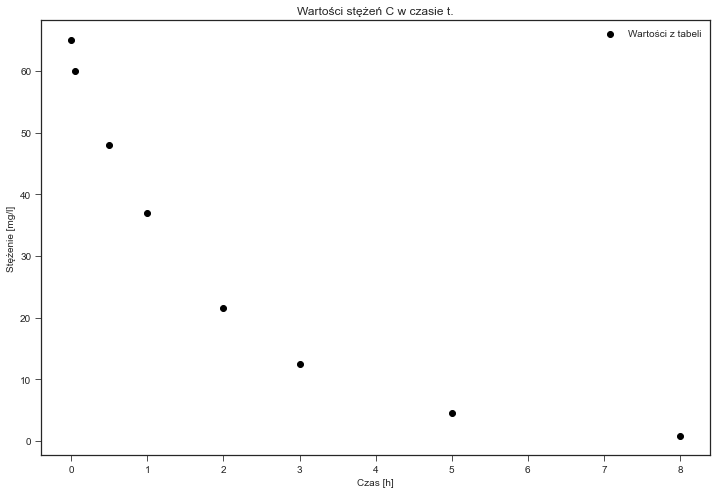

In [91]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-ticks')
import numpy as np

t_1=[0,0.05,0.5,1,2,3,5,8]
c_1=[65,60,48,37,21.5,12.5,4.5,0.9]

fig, ax=plt.subplots(figsize=(12,8))
plt.title("Wartości stężeń C w czasie t.")
line1=ax.scatter(t_1,c_1,c="black")
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line1],["Wartości z tabeli"])

Porównajmy wyniki z tabeli z rozwiązaniem analitycznym dla modelu jednokompartmentowego (jednorazowa dawka dożylna), zaimplementujmy to rozwiązanie.
$$C(t)=e^{-Kt} \cdot C_0$$

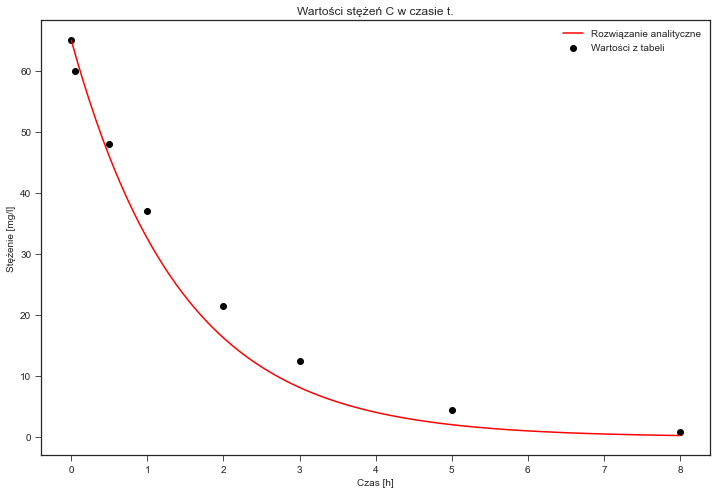

In [92]:
import numpy as np

t=np.linspace(0,8,100)
x=np.exp(-0.6931*t)*65 
line2,=ax.plot(t, x, c='r')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line1],["Rozwiązanie analityczne","Wartości z tabeli"])
fig

Sprawdźmy teraz jak do rozwiązania analitycznego mają się metody numeryczne i która najlepiej dopasowuje się do rozwiązania analitycznego, do tego wykorzystamy wcześniej napisane implementacje metod numerycznych.

In [93]:
def model_compart_vein(t, x):
    return -0.6931*x

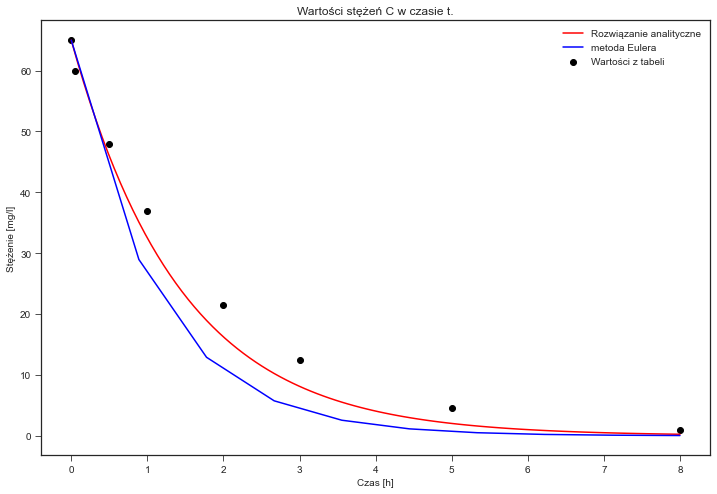

In [94]:
s=np.linspace(0,8,10)
x=eulers_method(model_compart_vein, s, 65)
line3,=ax.plot(s, x, c='b')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line1],["Rozwiązanie analityczne","metoda Eulera","Wartości z tabeli"])
fig

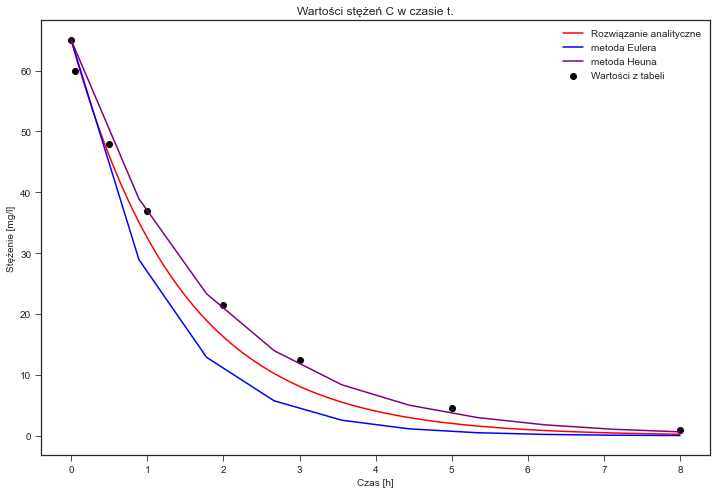

In [95]:
s=np.linspace(0,8,10)
x=heuns_method(model_compart_vein, s, 65)
line4,=ax.plot(s, x, c='purple')
ax.set_ylabel("Stężenie [mg/l]")
ax.legend([line2,line3,line4,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","Wartości z tabeli"])
ax.set_xlabel("Czas [h]")
fig

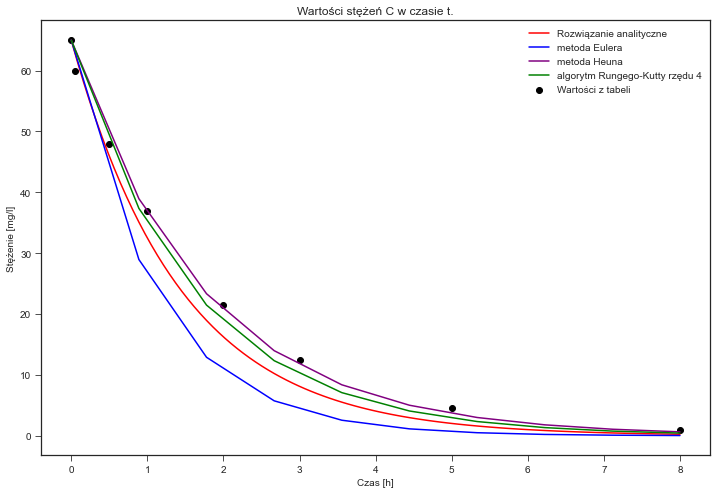

In [96]:
s=np.linspace(0,8,10)
x=runge_kuttys_method(model_compart_vein, s, 65)
line5,=ax.plot(s, x, c='g')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line4,line5,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","algorytm Rungego-Kutty rzędu 4","Wartości z tabeli"])
fig

Z wykresu możemy zauważyć, że najbardziej zbliżonym do rozwiązania analitycznego jest algorytm Rungego-Kutty rzędu 4.


#### 2. Implementacja modelu jednokompartmentowego (jednorazowa dawka pozanaczyniowa) [1]

Ochotnik otrzymał pozanaczyniowo 100 mg nimesulidu. Próbki krwi pobierano w ciągu  12  godzin  i  oznaczono  w  otrzymanej  surowicy  stężenia  nimesulidu w poniższej tabeli.     
$X_0=100 mg$, $\mathrm{k_a}=2.29/h$ $\mathrm{k_e}=0.279/h$ $V_d=18.7$

<table>
  <tr>
    <th>Czas [t]</th>
    <td>0,5</td>
    <td>1,00</td>
    <td>1,50</td>
    <td>2,00</td>
    <td>3,00</td>
    <td>6,00</td>
    <td>9,00</td>
    <td>12,00</td>
  </tr>
  <tr>
    <th>Stężenie [C]</th>
    <td>2,6</td>
    <td>3,95</td>
    <td>3,88</td>
    <td>3,55</td>
    <td>2,83</td>
    <td>1,27</td>
    <td>0,44</td>
    <td>0,17</td>
  </tr>
</table>

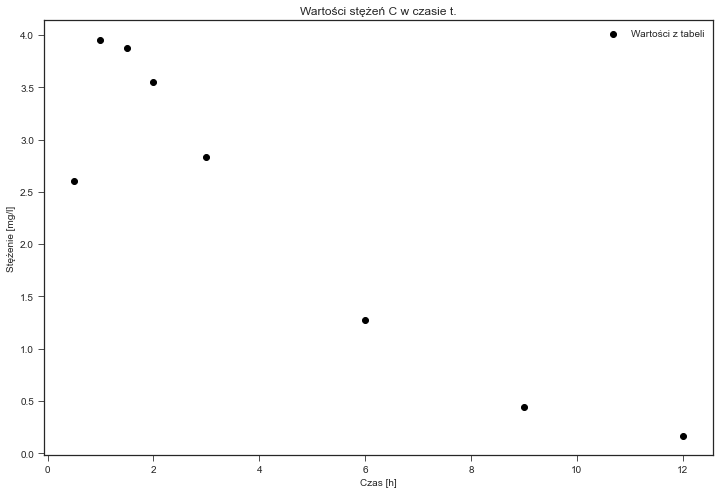

In [97]:
t_2=[0.5,1,1.5,2,3,6,9,12]
c_2=[2.6,3.95,3.88,3.55,2.83,1.27,0.44,0.17]

fig, ax=plt.subplots(figsize=(12,8))
plt.title("Wartości stężeń C w czasie t.")
line1=ax.scatter(t_2,c_2,c="black")
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line1],["Wartości z tabeli"])

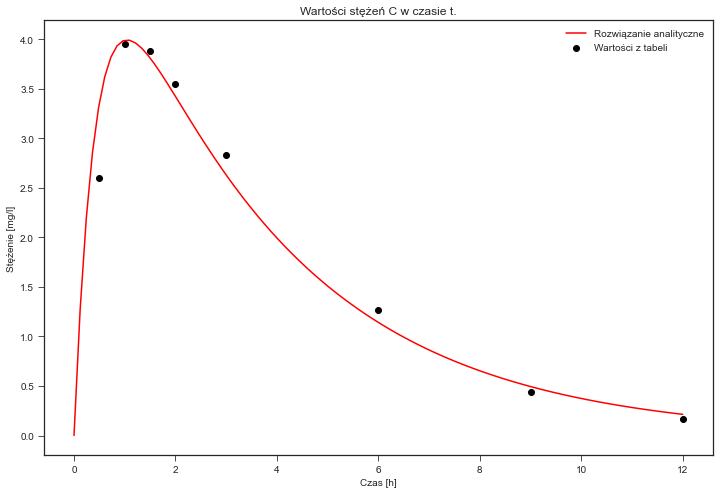

In [98]:
t_2=np.linspace(0,12,100)
x_2=((2.29*100)/(18.7*(2.29-0.279))*(np.exp(-0.279*t_2)-np.exp(-2.29*t_2)))
line2,=ax.plot(t_2, x_2, c='r')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line1],["Rozwiązanie analityczne","Wartości z tabeli"])
fig

In [99]:
def model_compart_cell(t, x):
    return (2.29*(100/18.7))*np.exp(-2.29*t)-(0.279*x)

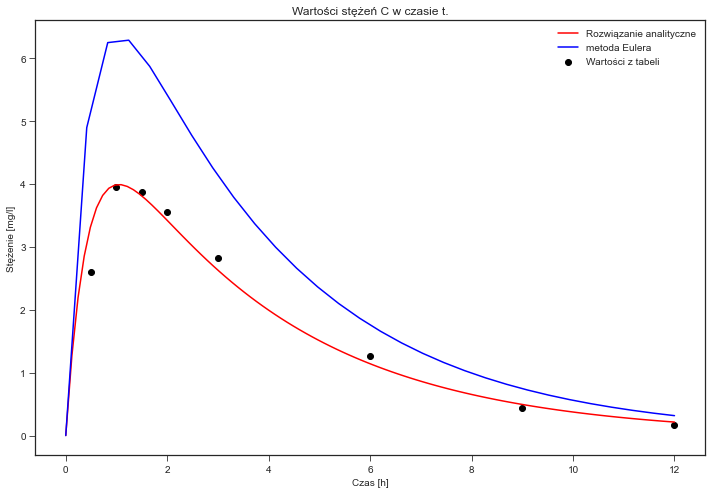

In [100]:
s=np.linspace(0,12,30)
x=eulers_method(model_compart_cell, s, 0)
line3,=ax.plot(s, x, c='b')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line1],["Rozwiązanie analityczne","metoda Eulera","Wartości z tabeli"])
fig

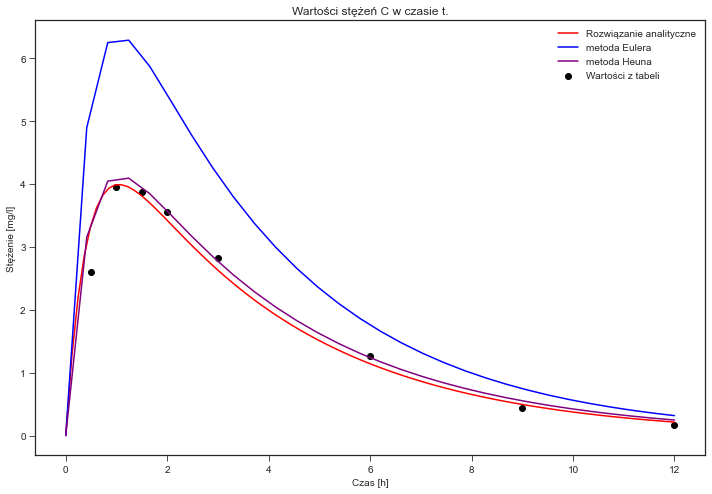

In [101]:
s=np.linspace(0,12,30)
x=heuns_method(model_compart_cell, s, 0)
line4,=ax.plot(s, x, c='purple')
ax.set_ylabel("Stężenie [mg/l]")
ax.legend([line2,line3,line4,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","Wartości z tabeli"])
ax.set_xlabel("Czas [h]")
fig

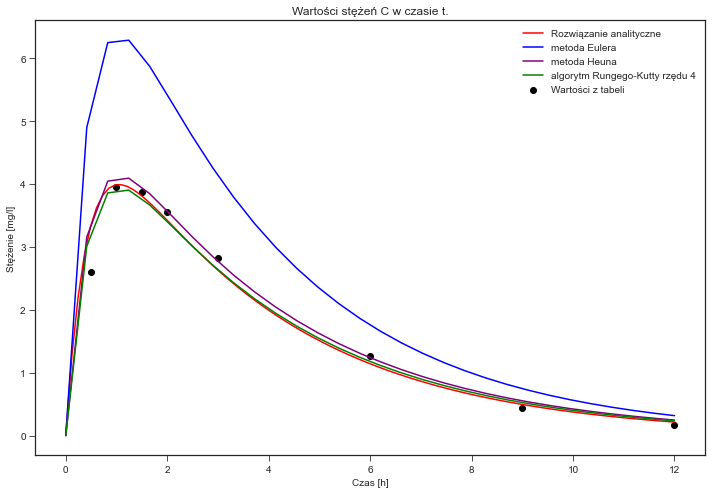

In [102]:
s=np.linspace(0,12,30)
x=runge_kuttys_method(model_compart_cell, s, 0)
line5,=ax.plot(s, x, c='g')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line4,line5,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","algorytm Rungego-Kutty rzędu 4","Wartości z tabeli"])
fig

Tu również widać, że najbardziej zbliżonym rozwiązaniem numerycznym do rozwiązania analitycznego jest algorytm Rungego-Kutty rzędu 4.

#### 3. Implementacja modelu jednokompartmentowego (wlew dożylny)[1]

Choremu podawano pewien lek we wlewie dożylnym przez 12h ze stałą prędkością 40mg/h. Wyniki pomiarów przedstawiono w poniższej tabeli. $V_d=10,1l$, $\mathrm{k}_e=0,414/\mathrm{h}$, $T=12\mathrm{h}$, $\mathrm{k_0}=40\mathrm{mg} / \mathrm{h}$.

<table>
  <tr>
    <th>Czas [t]</th>
    <td>1,00</td>
    <td>2,00</td>
    <td>4,00</td>
    <td>6,00</td>
    <td>8,00</td>
    <td>10,00</td>
    <td>12,00</td>
    <td>ZAKOŃCZENIE WLEWU</td>
    <td>14,00</td>
    <td>16,00</td>
    <td>18,00</td>
    <td>20,00</td>
    <td>22,00</td>
  </tr>
  <tr>
    <th>Stężenie [C]</th>
    <td>3,30</td>
    <td>5,40</td>
    <td>7,60</td>
    <td>8,70</td>
    <td>9,30</td>
    <td>9,60</td>
    <td>9,50</td>
    <td> </td>
    <td>4,10</td>
    <td>1,80</td>
    <td>0,76</td>
    <td>0,33</td>
    <td>0,14</td>
  </tr>
</table>

In [103]:
t=[1,2,4,6,8,10,12,14,16,18,20,22]
c=[3.3,5.4,7.6,8.7,9.3,9.6,9.5,4.1,1.8,0.76,0.33,0.14]

Wartości z tabeli na wykresie prezentują się następująco:

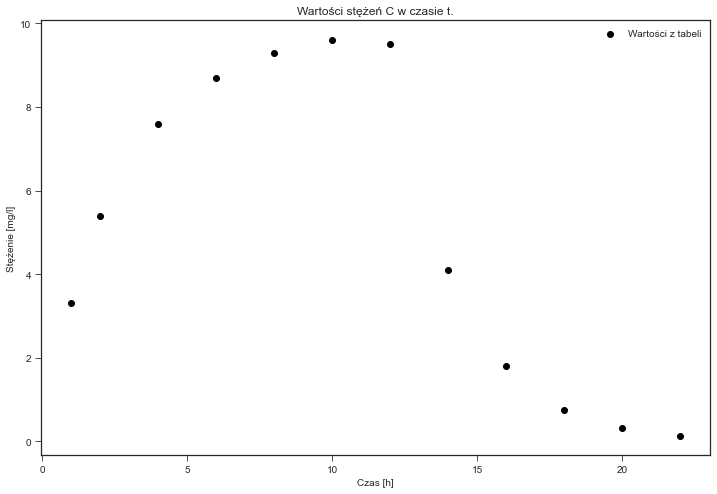

In [104]:
fig, ax=plt.subplots(figsize=(12,8))
plt.title("Wartości stężeń C w czasie t.")
line1=ax.scatter(t,c,c="black")
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend(["Wartości z tabeli"])

Zaimplementujmy teraz rozwiązanie analityczne:

$$C=\frac{\mathrm{k_0}}{\mathrm{K} \cdot V_d} \cdot (1 -\mathrm{e}^{-\mathrm{K}T}) \cdot \mathrm{e}^{-\mathrm{K}t'} $$

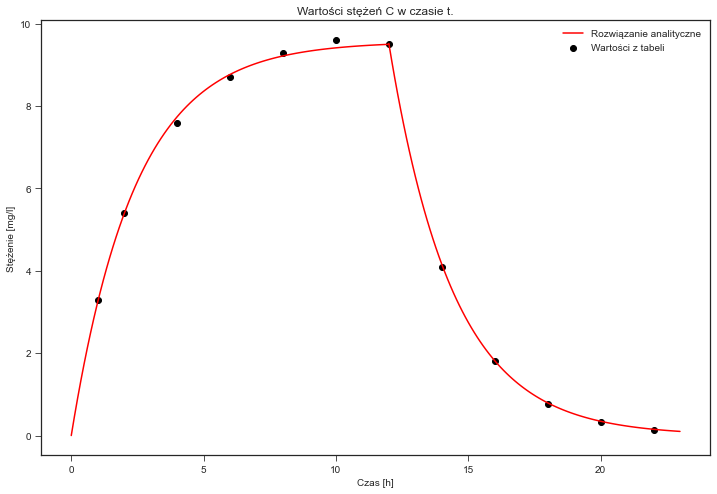

In [105]:
s=np.linspace(0,12,100)
x=((40)/(0.414*10.1))*(1-np.exp(-0.414*s))
line2,=ax.plot(s, x, c='r')
s=np.linspace(12,23,100)
x=((40)/(0.414*10.08))*(1-np.exp(-0.414*12))*(np.exp(-0.414*(s-12)))
ax.plot(s, x, c='r')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line1],["Rozwiązanie analityczne","Wartości z tabeli"])
fig

Porównajmy teraz metody numeryczne z rozwiązaniem analitycznym.

In [106]:
def continous_infusion(t,x):
        return (40/10.1)-0.414*x
def continous_infusion2(t,x):
        return -0.414*x

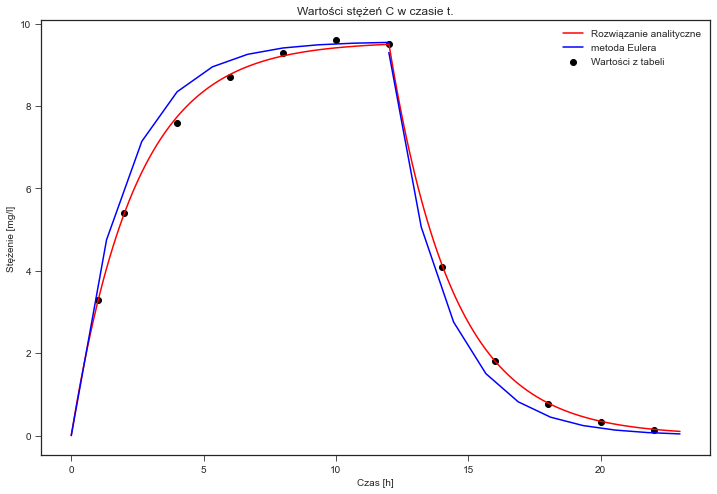

In [107]:
s=np.linspace(0,12,10)
x=eulers_method(continous_infusion, s, 0)
line3,=ax.plot(s, x, c='b')
s=np.linspace(12,23,10)
x=eulers_method(continous_infusion2, s, 9.3)
ax.plot(s, x, c='b')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line1],["Rozwiązanie analityczne","metoda Eulera","Wartości z tabeli"])
fig

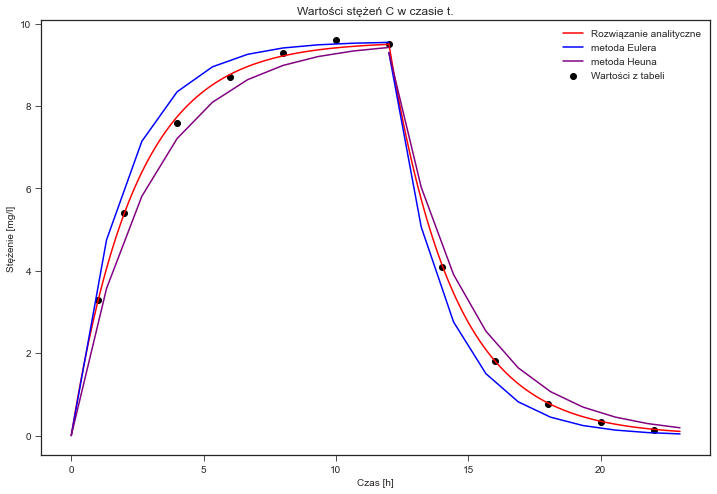

In [108]:
s=np.linspace(0,12,10)
x=heuns_method(continous_infusion, s, 0)
line4,=ax.plot(s, x, c='purple')
s=np.linspace(12,23,10)
x=heuns_method(continous_infusion2, s, 9.3)
ax.plot(s, x, c='purple')
ax.set_ylabel("Stężenie [mg/l]")
ax.legend([line2,line3,line4,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","Wartości z tabeli"])
ax.set_xlabel("Czas [h]")
fig

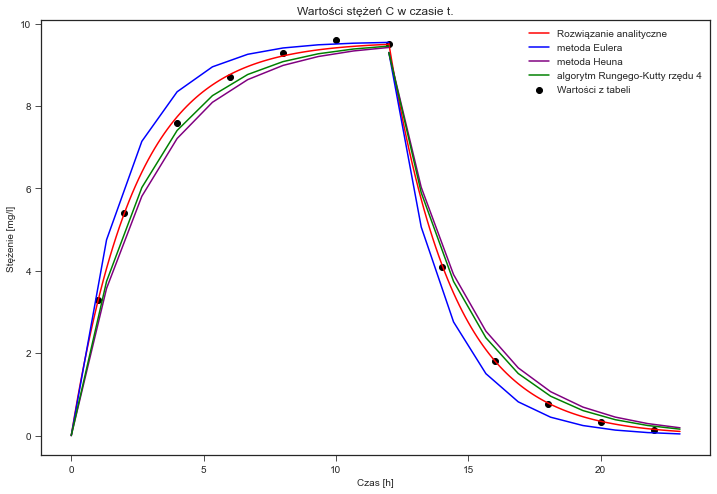

In [109]:
s=np.linspace(0,12,10)
x=runge_kuttys_method(continous_infusion, s, 0)
line5,=ax.plot(s, x, c='g')
s=np.linspace(12,23,10)
x=runge_kuttys_method(continous_infusion2, s, 9.3)
ax.plot(s, x, c='g')
ax.set_ylabel("Stężenie [mg/l]")
ax.set_xlabel("Czas [h]")
ax.legend([line2,line3,line4,line5,line1],["Rozwiązanie analityczne","metoda Eulera","metoda Heuna","algorytm Rungego-Kutty rzędu 4","Wartości z tabeli"])
fig

Widać, że w tym przypadku również najbardziej zbliżonym do rozwiązania analitycznego jest algorytm Rungego-Kutty rzędu 4.

---

Metody numeryczne pomimo często prostej implementacji i łatwego algorytmu posiadają swoje ograniczenia i defekty. Nie wszystkie będą w stanie modelować procesy z wystarczającą dokładnością, dlatego tak znacząco jest oprócz znajomości metod matematycznych, dokładne zrozumienie tematu i opisywanego równania. W przykładach przedstawionych wyżej jesteśmy w stanie sugerować się rozwiązaniem analitycznym równania, co znacznie ułatwia analizę dokładności i wybór najlepszego modelu, lecz nie zawsze możliwe jest uzyskanie rozwiązania analitycznego.

### 6. Podsumowanie

Farmakokinetyka jest ważną dziedziną nauki mającą ogromny wpływ na zdrowie i życie ludzkie. Nie jesteśmy w stanie prowadzić bezpiecznych farmakoterapii bez dokładnej znajomości procesu LADMER danej substancji. Pomimo iż jest to nauka ściśle związana z jakością naszego życia, to nadal brakuje nam danych na temat różnic procesów farmakodynamicznych u dzieci [6] i kobiet w ciąży [7]. Na szczęście farmakokinetyka jest prężnie rozwijającą się i zdobywającą coraz większą popularność dziedziną nauki, więc możemy spodziewać się coraz większej ilości danych, dzięki którym jeszcze lepiej poznamy tę dziedzinę.

### 7. Bibliografia:

[1] Herman T.W., *Farmakokinetyka. Teoria i Praktyka*, Wydawnictwo Lekarskie PZWL, Warszawa 2002

[2] Grabowski T., *Farmakokinetyka i biofarmacja*, www.biokinetica.pl, wydanie 04122015

[3] Orzechowska-Juzwenko K. (red.), *Podstawy farmakologii klinicznej*, VOLUMED, Wrocław 1997

[4] John C. Butcher, Numerical Methods for Ordinary Differential Equations, New York: John Wiley & Sons, 2003, ISBN 978-0-471-96758-3.

[5] Kendall Atkinson: An Introduction to Numerical Analysis. Wyd. 2. Nowy Jork: John Wiley & Sons, 1989. ISBN 978-0-471-50023-0.

[6] Anderson GD, Lynn AM. Optimizing pediatric dosing: a developmental pharmacologic approach. Pharmacotherapy. 2009 Jun;29(6):680-90. doi: 10.1592/phco.29.6.680. PMID: 19476420.

[7] Michael J. Avram, Pharmacokinetic studies in pregnancy, Seminars in Perinatology, Volume 44, Issue 3, 2020, 151227,ISSN 0146-0005